In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
# import technology table
def return_technology():
    technology = pd.read_csv(f'./../data/technology.csv')
    return technology

In [3]:
# import energy data
def return_energy_consumption(scenario):
    energy_consumption = pd.read_excel(f'./../TEAM-Kenya_data_out/scenarios-out/VEEMEIM_QF{scenario}.xlsx')  
    return energy_consumption

In [4]:
years = range(2015, 2051)
scenarios = ['OMOKA', 'ELECTRICDREAMS', 'KUJINAO', 'STREETFIGHTING']

In [5]:
consumption_by_scenario = {}

for scenario in scenarios:
    
    consumption = return_energy_consumption(scenario)
        
    consumption_by_year = {}
    for year in years:
        
        consumption_by_fuel = {}
        for fuelID in consumption.FuelID.unique():
            
            fuel_consumed = consumption[(consumption['Year'] == year) & (consumption['FuelID'] == fuelID)]['VEEMQF_Value'].sum() * 1e6  # litres or kWh
            
            consumption_by_fuel[fuelID] = fuel_consumed
            
        consumption_by_year[year] = consumption_by_fuel
            
    consumption_by_scenario[scenario] = consumption_by_year

In [6]:
chart_data = {}

for scenario in scenarios:
    
    series = []
    for year in years:
        series.append(sum(consumption_by_scenario[scenario][year].values()))
    
    chart_data[scenario] = series
    

In [7]:
chart_data_by_fuel = {}

for scenario in scenarios:
    data_by_fuel = {}
    for fuelID in [1,2,12]:
        
        series = []
        for year in years:
            series.append(consumption_by_scenario[scenario][year][fuelID])
        
        data_by_fuel[fuelID] = series
        
    chart_data_by_fuel[scenario] = data_by_fuel

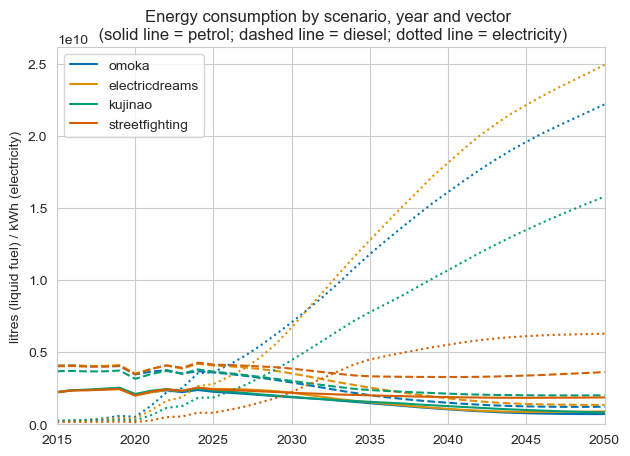

In [9]:
fig, ax = plt.subplots()
clrs = sns.color_palette('colorblind')

lnstls = ['-','--',':','.-']
cnt = 0
for scenario in scenarios:
    lnstl_cnt = 0
    
    for fuelID in [1,2,12]:
        if (lnstl_cnt == 0):
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], label=scenario.lower(), linestyle=lnstls[lnstl_cnt])
        else:
            ax.plot(range(2015, 2051), chart_data_by_fuel[scenario][fuelID], color=clrs[cnt], linestyle=lnstls[lnstl_cnt])
        
        lnstl_cnt += 1
    cnt += 1
    
ax.legend()
ax.set_ylabel('litres (liquid fuel) / kWh (electricity)')
ax.set_ylim(bottom=0)
ax.set_xlim(left=2015, right=2050)
ax.set_title('Energy consumption by scenario, year and vector \n (solid line = petrol; dashed line = diesel; dotted line = electricity)')

fig.tight_layout()
plt.savefig('energy-consumption-by-vector.pdf')